***Currently working on the dataset from the Global Terrorism Database (GTD) maintained by the University of Maryland to gain insights into current state of terrorism in the US, and possibly making predictions of future unrewarded risks. I foresee this analysis valuable to the US Department of Homeland Security, other government establishments, businesses or individuals that care about safety of lives and properties.***

***Dataset can be found at: http://www.start.umd.edu/gtd/***

***Given an attacker's group name, can we predict if the attack is *** 

***Overseeing Mentor: Dr. Stylianos Kampakis***

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
matplotlib.style.use('ggplot')


In [2]:
%matplotlib inline

## Exploratory Data Analysis (EDA)

The dataset was downloaded as an excel spreadsheet. This will be uploaded into Pandas and then we carry out an Exploratory Data Analysis (EDA). 

In [3]:
file= r'C:\Users\andre\Desktop\git_jupyter\springboard_mini_project\capstone_projects/globalterrorismdb_0617dist.xlsx'
df= pd.read_excel(file)

In [4]:
#restrict this dataset to occurrences in the US.
df1= df['country_txt'].str.contains('United States')
df2= df[df1]
df2.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN


In [5]:
#structure of DataFrame i need
df2.shape

(2758, 135)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 5 to 169902
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 2.9+ MB


In [7]:
#shows number missing values for each feature in the DataFrame
df2.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
approxdate            2721
extended                 0
resolution            2746
country                  0
country_txt              0
region                   0
region_txt               0
provstate                0
city                     0
latitude                 1
longitude                1
specificity              0
vicinity                 0
location              1852
summary               1054
crit1                    0
crit2                    0
crit3                    0
doubtterr                0
alternative           2364
alternative_txt       2364
multiple                 0
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
                      ... 
propextent            1191
propextent_txt        1191
propvalue             1840
propcomment           1748
ishostkid              176
nhostkid              2696
n

In [8]:
class EDA():
    '''Used for running Exploratory Data Analysis'''
    def __init__(self):
        ''''''
    def drop_col_nan(self, x, threshold):
        for col in x.columns:
            amt = sum(x[col].isnull())/float(len(x)) * 100
            if amt > threshold:
                x = x.drop(col,1)
                pd.set_option('display.max_columns', None)
        return x
        
    def drop_noisy_col(self, y, w=[]):
        y=y.drop(w, 1)
        return y
                
    def drop_col_txt(self, z):
        for c in z.columns:
            c = str(c)
            if c[-3:] =='txt':
                z = z.drop(c, 1)
                pd.set_option('display.max_columns', None)
        return z     
       

In [9]:
my_EDA = EDA()
df3=my_EDA.drop_col_nan(df2, 80)

In [10]:
df3.index = range(len(df2))

In [11]:
df4=my_EDA.drop_col_txt(df3)

In [12]:
df5=my_EDA.drop_noisy_col(df4, ['corp1', 'motive', 'target1', 'weapdetail','country','addnotes', 'summary', 'scite1' , 'scite2' , 'scite3' , 'dbsource', 'INT_LOG' ,'longitude','specificity', 'eventid', 'location','region', 'propcomment', 'latitude'])

In [13]:
df5.shape

(2758, 40)

In [14]:
df5.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
provstate          0
city               0
vicinity           0
crit1              0
crit2              0
crit3              0
doubtterr          0
multiple           0
success            0
suicide            0
attacktype1        0
targtype1          0
targsubtype1     120
natlty1            9
gname              0
guncertain1        0
individual         0
nperps           982
nperpcap        1055
claimed         1051
weaptype1          0
weapsubtype1     259
nkill             73
nkillus          953
nkillter        1004
nwound            93
nwoundus         973
nwoundte        1018
property           0
propextent      1191
propvalue       1840
ishostkid        176
ransom           588
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

In [15]:
df5.head(2)

,iyear,imonth,iday,extended,provstate,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_IDEO,INT_MISC,INT_ANY
0,1970,1,1,0,Illinois,Cairo,0,1,1,1,0,0,1,0,2,3,22.0,217.0,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,0.0,0.0,-9,0,-9
1,1970,1,2,0,California,Oakland,0,1,1,1,1,0,1,0,3,21,107.0,217.0,Unknown,0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,22500.0,0.0,0.0,-9,0,-9


In [16]:
#writer = pd.ExcelWriter('abc2_xlsx', engine='xlsxwriter')

In [17]:
#df5.to_excel(writer, sheet_name='Sheet1')

In [18]:
#writer.save()

### Imputing Missing Values

In [19]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [20]:
df6 = DataFrameImputer().fit_transform(df5)


In [21]:
df6.isnull().sum()

iyear           0
imonth          0
iday            0
extended        0
provstate       0
city            0
vicinity        0
crit1           0
crit2           0
crit3           0
doubtterr       0
multiple        0
success         0
suicide         0
attacktype1     0
targtype1       0
targsubtype1    0
natlty1         0
gname           0
guncertain1     0
individual      0
nperps          0
nperpcap        0
claimed         0
weaptype1       0
weapsubtype1    0
nkill           0
nkillus         0
nkillter        0
nwound          0
nwoundus        0
nwoundte        0
property        0
propextent      0
propvalue       0
ishostkid       0
ransom          0
INT_IDEO        0
INT_MISC        0
INT_ANY         0
dtype: int64

In [22]:
df6.dtypes

iyear             int64
imonth            int64
iday              int64
extended          int64
provstate        object
city             object
vicinity          int64
crit1             int64
crit2             int64
crit3             int64
doubtterr         int64
multiple          int64
success           int64
suicide           int64
attacktype1       int64
targtype1         int64
targsubtype1    float64
natlty1         float64
gname            object
guncertain1     float64
individual        int64
nperps          float64
nperpcap        float64
claimed         float64
weaptype1         int64
weapsubtype1    float64
nkill           float64
nkillus         float64
nkillter        float64
nwound          float64
nwoundus        float64
nwoundte        float64
property          int64
propextent      float64
propvalue       float64
ishostkid       float64
ransom          float64
INT_IDEO          int64
INT_MISC          int64
INT_ANY           int64
dtype: object

***https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas ***

** Testing Data **

In [23]:
df6_test = df6.loc[df6['gname'].isin(['Unknown'])]

In [24]:
df6_test = df6_test.drop('gname', 1)

**Training Data**

In [25]:
df6_train = df6.loc[df6['gname'].isin(['Unknown']) == False]
df6_train_x = pd.DataFrame(df6_train)
df6_train_x = df6_train_x.drop('gname',1)
df6_train_y = df6_train.gname


** Dimensions of the train and test data **


In [26]:
df6_train_x.shape

(2206, 39)

In [27]:
df6_train_y.shape

(2206,)

In [28]:
df6_test.shape

(552, 39)

**Feature Selection**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

#from sklearn.preprocessing import LabelEncoder
#y2 = ["A","1","4","F","A","1","4","F"]
#lb = LabelEncoder()
#y = lb.fit_transform(y2)
# y is now: array([2, 0, 1, 3, 2, 0, 1, 3])

#In order to get back to your original labels (e.g. after classifying unseen data using SVC), use the inverse_transform of LabelEncoder to restore the string labels:

#lb.inverse_transform(y)
# => array(['A', '1', '4', 'F', 'A', '1', '4', 'F'], dtype='|S1')

#clf = DecisionTreeClassifier()
#clf = clf.fit(df6_train_x, df6_train_y)

In [30]:
df6_train_x.provstate = lb.fit_transform(df6_train_x.provstate)
df6_train_x.city = lb.fit_transform(df6_train_x.city)
df6_train_x.head()

,iyear,imonth,iday,extended,provstate,city,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,ransom,INT_IDEO,INT_MISC,INT_ANY
0,1970,1,1,0,13,83,0,1,1,1,0,0,1,0,2,3,22.0,217.0,0.0,0,-99.0,-99.0,0.0,5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,-9,0,-9
2,1970,1,2,0,51,296,0,1,1,1,0,0,1,0,7,4,28.0,217.0,0.0,0,1.0,1.0,1.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,60000.0,0.0,0.0,0,0,0
3,1970,1,3,0,51,296,0,1,1,1,0,0,1,0,7,2,21.0,217.0,0.0,0,1.0,1.0,0.0,8,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,5000.0,0.0,0.0,0,0,0
4,1970,1,1,0,51,39,0,1,1,0,1,0,0,0,3,4,27.0,217.0,0.0,0,-99.0,-99.0,0.0,6,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0,0,0
5,1970,1,6,0,5,141,0,1,1,1,1,0,1,0,7,4,28.0,217.0,0.0,0,-99.0,-99.0,0.0,8,19.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,305.0,0.0,0.0,-9,0,-9


In [31]:
clf = DecisionTreeClassifier()
clf = clf.fit(df6_train_x, df6_train_y)

**Feature Importance**

In [32]:
for feature, rank in enumerate(list(clf.feature_importances_)):
        print (df6_train_x.columns[feature], rank)

iyear 0.202952975835
imonth 0.0572876055289
iday 0.0418294707866
extended 0.000467162064577
provstate 0.0803852110722
city 0.0594069151955
vicinity 0.0
crit1 0.000467162064577
crit2 0.00334963514393
crit3 0.000467162064577
doubtterr 0.00398644961772
multiple 0.0226023516673
success 0.00669488611699
suicide 0.000467162064577
attacktype1 0.0241431720092
targtype1 0.0797769773779
targsubtype1 0.0769759656246
natlty1 0.0144926390629
guncertain1 0.017422476502
individual 0.0019960560941
nperps 0.0156149082339
nperpcap 0.0126523173251
claimed 0.0182851169017
weaptype1 0.0284495852095
weapsubtype1 0.0464110366853
nkill 0.00679497794735
nkillus 0.00436828844414
nkillter 0.00358178072406
nwound 0.0114199321596
nwoundus 0.00588443936707
nwoundte 0.000934324129154
property 0.0127378048254
propextent 0.00578627296449
propvalue 0.0224699437114
ishostkid 0.00182971808626
ransom 0.000622882752769
INT_IDEO 0.0329956656443
INT_MISC 0.0198880943393
INT_ANY 0.0541014746563


Features which form upper 60% percentile are selected. The rest are discarded as their relevance is too low.

In [33]:
perc_val = np.percentile(clf.feature_importances_, 80)
index_relevant_features = []
for feature, rank in enumerate(list(clf.feature_importances_)):
        if rank >= perc_val:
            print (df6_train_x.columns[feature], rank)
            index_relevant_features.append(feature)

iyear 0.202952975835
imonth 0.0572876055289
provstate 0.0803852110722
city 0.0594069151955
targtype1 0.0797769773779
targsubtype1 0.0769759656246
weapsubtype1 0.0464110366853
INT_ANY 0.0541014746563


In [34]:
df6_train_x = pd.DataFrame(df6_train_x[df6_train_x.columns[index_relevant_features]])


In [35]:
df6_train_x.shape

(2206, 8)

In [36]:
df6_train_y.shape


(2206,)

In [37]:
df6_test = df6_test[df6_test.columns[index_relevant_features]]
df6_test.shape

(552, 8)

**Feature Ranking of final Model**

In [38]:
clf = clf.fit(df6_train_x, df6_train_y)
clf.feature_importances_
data_feature_rank = pd.DataFrame(clf.feature_importances_)
data_feature_rank.columns = ['rank']

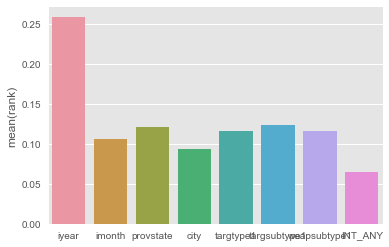

In [40]:
sns.barplot(x = df6_train_x.columns, y = 'rank' , data = data_feature_rank, order = df6_train_x.columns)


**Training and testing the model on the train data**


In [ ]:
clf_dtree = DecisionTreeClassifier()
clf_dtree = clf_dtree.fit(df6_train_x, df6_train_y)
clf_dtree.score(df6_train_x,df6_train_y)

**Evaluate Model Accuracy**


In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df6_train_x, df6_train_y, test_size=0.3, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

**Fitting the Random Forest Classifier onto the training dataset.**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train, y_train)

Evaluating the model accuracy on the validation set.


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf_rf.predict(X_test)
accuracy_score(y_test, y_pred)